In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MongoLoader import Mongo
from itertools import combinations
from math import comb
import plotly.graph_objects as go

from Invoker import Invoker
from Utils import *

In [5]:
invoker = Invoker()
Invoker.load_stock_day(invoker)
invoker.truncate()

I am a beacon of knowledge blazing out across a black sea of ignorance.
Daily open loaded successfully.
Daily close loaded successfully.
Daily low loaded successfully.
Daily high loaded successfully.
Daily volume loaded successfully.
Daily money loaded successfully.
Daily vwap loaded successfully.
Daily rate loaded successfully.
Successfully truncated for open data.
Successfully truncated for close data.
Successfully truncated for high data.
Successfully truncated for low data.
Successfully truncated for volume data.
Successfully truncated for money data.
Successfully truncated for rate data.
Successfully truncated for vwap data.


In [9]:
colarr = []
for col in invoker.rate.columns:
    if sum(np.isnan(invoker.rate[col])) == 0:
        colarr.append(col)
len(colarr)

41

In [199]:
coliter = iter(combinations(colarr, 2))

In [196]:
rsdf = invoker.rate[colarr].rolling(5).sum()
rsdf = rsdf.dropna()

In [200]:
high = -1
low = 1
hcb = None
lcb = None
while True:
    try:
        cb = next(coliter)
    except:
        break
    cor = rsdf[list(cb)].corr().iloc[0, 1]
    if cor > high:
        high = cor
        hcb = cb
    if cor < low:
        low = cor
        lcb = cb

In [201]:
print(hcb)
print(high)
print("__________________________________")
print(lcb)
print(low)

('600837', '601211')
0.8517330502572844
__________________________________
('601288', '603806')
-0.10553790263480084


In [129]:
df = invoker.rate

In [169]:
def ddd(df: pd.DataFrame, color_list, jupyter=True, title=""):

    assert df.shape[1] == len(color_list)

    traces = []

    dfcol = df.columns
    for _ in range(df.shape[1]):
        trace = plotly.graph_objs.Scattergl(
            name=dfcol[_],
            x=df.index,
            y=df[dfcol[_]].values,
            line=dict(color=color_list[_])
        )

        traces.append(trace)

    layout = plotly.graph_objs.Layout(
        title="Plot series data of: " + title
    )

    fig = plotly.graph_objs.Figure(data=traces, layout=layout)
    if jupyter:
        plotly.offline.init_notebook_mode(connected=True)
    return plotly.offline.iplot(fig, filename="dataplot")

In [171]:
plt.figure(figsize=(20, 1))
ddd(df=invoker.rate[["600837", "601211"]].iloc[-120:, :] ,color_list=["red", "blue"], title="returns")
plt.show()

<Figure size 2000x100 with 0 Axes>

In [83]:
np.correlate(invoker.rate["601211"].dropna(), invoker.rate["600837"].dropna())

array([0.39304841])

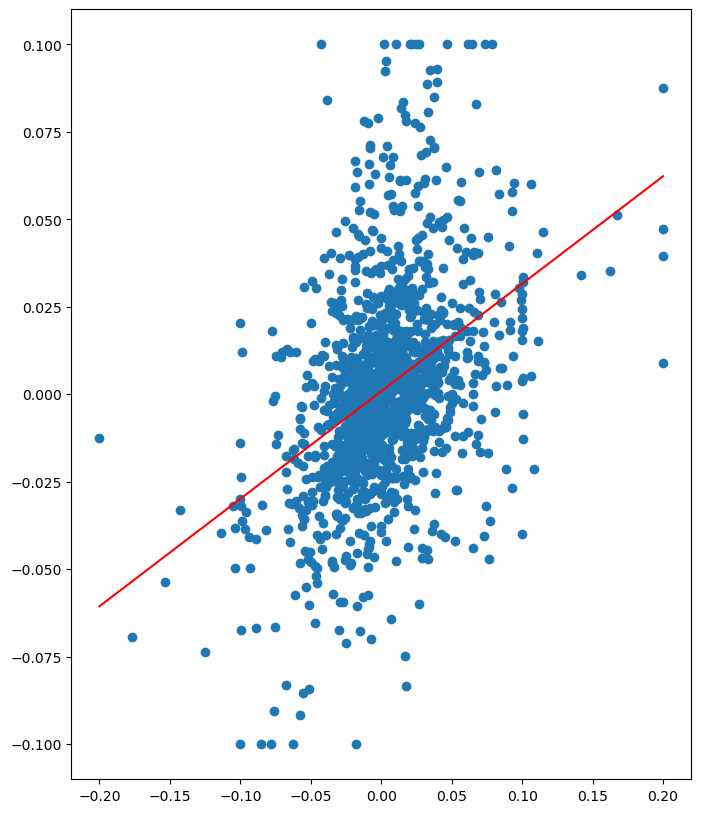

In [105]:
lr = LinearRegression()
fit = lr.fit(X=invoker.rate["300274"].values.reshape(-1, 1), y=invoker.rate["002594"].values)

plt.figure(figsize=(8, 10))
plt.scatter(x=invoker.rate["300274"], y=invoker.rate["002594"])
xlst = np.linspace(-0.2, 0.2, 40000)
ylst = xlst * fit.coef_ + fit.intercept_
plt.plot(xlst, ylst, color="red")
plt.show()

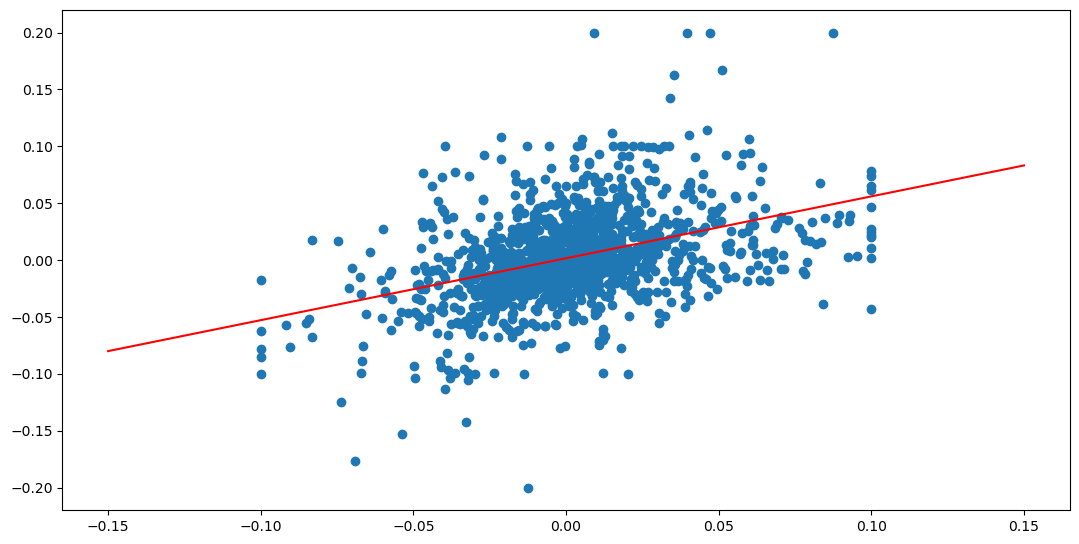

In [115]:
lr = LinearRegression()
fit = lr.fit(X=invoker.rate["002594"].values.reshape(-1, 1), y=invoker.rate["300274"].values)

plt.figure(figsize=(13, 6.5))
plt.scatter(x=invoker.rate["002594"], y=invoker.rate["300274"])
xlst = np.linspace(-0.15, 0.15, 30000)
ylst = xlst * fit.coef_ + fit.intercept_
plt.plot(xlst, ylst, color="red")
plt.show()

In [117]:
lr.predict([[-2.5]])

array([-1.35867811])

(array([  1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
         0.,   0.,   0.,   0.,   2.,   3.,   3.,  15.,  10.,  17.,  29.,
        46.,  87., 130., 214., 252., 214., 141., 107.,  62.,  28.,  17.,
        10.,   9.,   7.,   3.,   1.,   4.,   0.,   1.,   1.,   2.,   1.,
         2.,   1.,   0.,   0.,   0.,   1.]), array([-0.07660299, -0.07373548, -0.07086797, -0.06800047, -0.06513296,
       -0.06226545, -0.05939795, -0.05653044, -0.05366293, -0.05079543,
       -0.04792792, -0.04506041, -0.04219291, -0.0393254 , -0.0364579 ,
       -0.03359039, -0.03072288, -0.02785538, -0.02498787, -0.02212036,
       -0.01925286, -0.01638535, -0.01351784, -0.01065034, -0.00778283,
       -0.00491532, -0.00204782,  0.00081969,  0.0036872 ,  0.0065547 ,
        0.00942221,  0.01228971,  0.01515722,  0.01802473,  0.02089223,
        0.02375974,  0.02662725,  0.02949475,  0.03236226,  0.03522977,
        0.03809727,  0.04096478,  0.04383229,  0.04669979,  0.0495673 ,
        0.0524

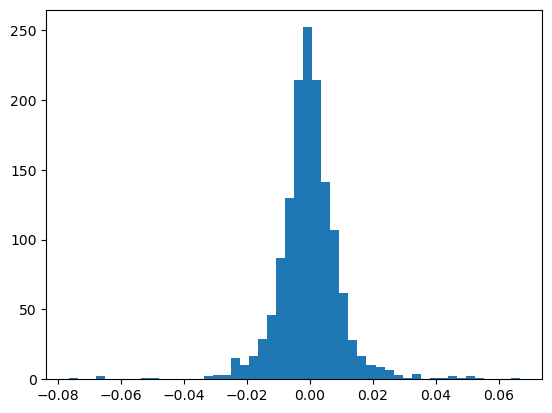

In [174]:
plt.hist((invoker.rate["600837"] - invoker.rate["601211"]).values, bins=50)

In [29]:
from scipy.stats import normaltest

In [42]:
val = port["600837"].values - port["601211"].values
val = (val-np.nanmean(val))/np.nanstd(val)

In [61]:
from scipy.stats import kde

In [57]:
gau = [random.gauss(0, 1) for i in range(100000)]

In [62]:
kde.gaussian_kernel_estimate()

C:\Users\tianj\AppData\Local\Temp\ipykernel_17480\3388915967.py:1: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde.gaussian_kde(val)


In [41]:
normaltest(np.random.normal(0, 0.1, 1000000))

NormaltestResult(statistic=1.4334430544919552, pvalue=0.48835067873014126)

In [8]:
invoker.data["volume"]["002291"]

date
2017-01-03     22792.0
2017-01-04     30105.0
2017-01-05     18616.0
2017-01-06     16175.0
2017-01-09     67323.0
                ...   
2022-11-07    331873.0
2022-11-08    215571.0
2022-11-09    273869.0
2022-11-10    616608.0
2022-11-11    603824.0
Name: 002291, Length: 1424, dtype: float64

In [8]:
sss = 

In [9]:
def reduce_trade_signal(series: pd.Series) -> pd.Series:
    if series is None:
        return 0
    direction, bool_lst = series[0], [True]
    for _ in series[1:]:
        if _ == direction:
            bool_lst.append(False)
        else:
            bool_lst.append(True)
            direction = _
    return series[bool_lst]


def reduced_trade_return(code, signal):
    cr, idx, rate = 0, signal.index, invoker.data["rate"][code]
    for _ in range(len(signal)-1):
        start, end = idx[_], idx[_+1]
        cr += signal[_] * (rate.loc[start: end].sum() - rate[idx[_]] + rate[idx[_+1]])
    return cr

In [146]:
def draw_candle(code: str):
    fig = go.Figure(data=[go.Candlestick(
        x=pd.to_datetime(invoker.close[code].index[-300:]), 
        open=invoker.open[code][-300:],
        high=invoker.high[code][-300:],
        low=invoker.low[code][-300:], 
        close=invoker.close[code][-300:], 
        increasing_line_color="red", 
        decreasing_line_color= "green")])
    fig.show()

In [ ]:
go.Sc

In [152]:
pd.DataFrame(invoker.db["stock_day"].find({"code": "002577"})).drop(
            columns=["_id", "date_stamp"]
        ).rename(
            columns={"amount": "money", "vol": "volume"}
        ).set_index("date")

,open,close,high,low,volume,money,code
date,,,,,,,
2011-04-28,33.00,32.09,35.00,31.81,46593.0,153167856.0,002577
2011-04-29,30.50,30.71,31.40,30.22,16701.0,51410204.0,002577
2011-05-03,30.64,30.23,30.70,29.78,9251.0,27895896.0,002577
2011-05-04,30.20,30.25,30.80,29.88,7658.0,23293388.0,002577
2011-05-05,30.03,30.08,30.27,29.90,5193.0,15615463.0,002577
...,...,...,...,...,...,...,...
2022-11-09,12.33,12.15,12.33,12.10,15191.0,18499622.0,002577
2022-11-10,12.12,12.17,12.23,12.00,16934.0,20608980.0,002577
2022-11-11,12.26,12.02,12.40,12.00,28824.0,34982168.0,002577


In [147]:
draw_candle("002577")

In [119]:
def ddd(series_list, color_list, legend_list, jupyter=True, description=None):

    assert len(series_list) == len(color_list)

    traces = []

    for _ in range(len(series_list)):
        if type(series_list[_]) == pd.DataFrame:
            series_list[_] = series_list[_].iloc[:, 0]

        trace = plotly.graph_objs.Scattergl(
            name=legend_list[_],
            x=series_list[_].index,
            y=series_list[_].values,
            line=dict(color=color_list[_])
        )

        traces.append(trace)

    if description:
        layout = plotly.graph_objs.Layout(
            title=description
        )
    else:
        layout = plotly.graph_objs.Layout(
            title="Plot series data of: " + series_list[0].name)

    fig = plotly.graph_objs.Figure(data=traces, layout=layout)
    if jupyter:
        plotly.offline.init_notebook_mode(connected=True)
    return plotly.offline.iplot(fig, filename="dataplot")

In [120]:
ddd(series_list=[obv["002577"], kkk], color_list=["blue", "purple"], legend_list=["obv", "maobv30"])

NameError: name 'obv' is not defined

In [ ]:
def reduced_trade_return(code, signal):
    cr, idx, rate = 0, signal.index, invoker.data["rate"][code]
    for _ in range(len(signal)-1):
        start, end = idx[_], idx[_+1]
        cr += signal[_] * (rate.loc[start: end].sum() - rate[idx[_]] + rate[idx[_+1]])
    return cr